### My prompt:
"ViT Image Classif" give me python jupyter note book code of Vision Transformer Image classification custom model training as below requirements.
1. Utilize GPU
2. Transfer Learning with pretrain weight
3. Custom dataset folder
4. Ratio Training and Testing 70/30 autosplit with random
5. Number of classes is the number of subfolders under custom dataset folder
6. Preset dropout rate
7. Preset augmentation option
8. Print result Acc and Loss of Training and testing every epoch
9. Trend chart Acc and Loss of Training and testing
10. Preset number of epoch
11. summary info before training loop.
    11.1 Custom dataset folder
    11.2 Number of classes with class name
    11.3 Preset dropout rate
    11.4 Training Testing Ratio with number of images
    11.5 Learning rate
    11.6 Dropout P value
12. Save model file with timestamp name in the custom dataset folder

### gpt-4-turbo: 
To fulfill your request, I'll provide a Python Jupyter notebook code that uses a Vision Transformer (ViT) for image classification with transfer learning on a custom dataset. Please note that in practice, you would need to install the necessary libraries, such as torch, torchvision, transformers, and matplotlib, and have a compatible GPU environment.

Here is an example of what your Jupyter notebook might look like:

In [1]:
import os
import time
import torch
import timm
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import train_test_split
from datetime import datetime
from PIL import Image

In [2]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Custom dataset folder
dataset_path = 'dataset_ebs'  # Update this path

In [3]:
# Preset values
dropout_rate = 0.0
batch_size = 32
learning_rate = 1e-4
num_epochs = 10
image_size = 224

In [4]:
# Data augmentation and normalization for training
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load custom dataset
dataset = datasets.ImageFolder(dataset_path, transform=transform)
class_names = dataset.classes
num_classes = len(class_names)

In [5]:
# Split dataset into training and validation sets
train_size = int(0.7 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [6]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [7]:
# Load pre-trained ViT model with specified dropout rate
model = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=num_classes, drop_rate=dropout_rate)
model = model.to(device)

In [8]:
# Loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
# Summary info before training loop
print(f"Custom dataset folder: {dataset_path}")
print(f"Number of classes: {num_classes} with class names: {class_names}")
print(f"Preset dropout rate: {dropout_rate}")
print(f"Training/Testing Ratio: {train_size}/{val_size}")
print(f"Learning rate: {learning_rate}")

Custom dataset folder: dataset_ebs_timm
Number of classes: 2 with class names: ['goods', 'rejects']
Preset dropout rate: 0.0
Training/Testing Ratio: 491/211
Learning rate: 0.0001


In [10]:
# Training and validation
train_acc_history, val_acc_history = [], []
train_loss_history, val_loss_history = [], []

In [11]:
for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss, train_correct = 0.0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        _, predictions = torch.max(outputs, 1)
        train_correct += torch.sum(predictions == labels.data)
    
    # Validation
    model.eval()
    val_loss, val_correct = 0.0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predictions = torch.max(outputs, 1)
            val_correct += torch.sum(predictions == labels.data)
    
    # Calculate average losses and accuracy
    train_loss = train_loss / train_size
    train_acc = train_correct.double() / train_size
    val_loss = val_loss / val_size
    val_acc = val_correct.double() / val_size

    # Save history for plotting
    train_acc_history.append(train_acc.cpu().numpy())
    train_loss_history.append(train_loss)
    val_acc_history.append(val_acc.cpu().numpy())
    val_loss_history.append(val_loss)

    # Print results every epoch
    print(f"Epoch {epoch+1}/{num_epochs}.. "
          f"Train loss: {train_loss:.4f}.. "
          f"Train accuracy: {train_acc:.4f}.. "
          f"Val loss: {val_loss:.4f}.. "
          f"Val accuracy: {val_acc:.4f}")

Epoch 1/10.. Train loss: 0.7454.. Train accuracy: 0.6110.. Val loss: 0.5758.. Val accuracy: 0.6588
Epoch 2/10.. Train loss: 0.4271.. Train accuracy: 0.8045.. Val loss: 0.9014.. Val accuracy: 0.6540
Epoch 3/10.. Train loss: 0.6881.. Train accuracy: 0.6171.. Val loss: 0.6605.. Val accuracy: 0.6351
Epoch 4/10.. Train loss: 0.6244.. Train accuracy: 0.6375.. Val loss: 0.5023.. Val accuracy: 0.7299
Epoch 5/10.. Train loss: 0.3835.. Train accuracy: 0.8269.. Val loss: 0.0589.. Val accuracy: 0.9810
Epoch 6/10.. Train loss: 0.0467.. Train accuracy: 0.9898.. Val loss: 0.0327.. Val accuracy: 0.9858
Epoch 7/10.. Train loss: 0.0235.. Train accuracy: 0.9939.. Val loss: 0.0350.. Val accuracy: 0.9810
Epoch 8/10.. Train loss: 0.0250.. Train accuracy: 0.9939.. Val loss: 0.5713.. Val accuracy: 0.8341
Epoch 9/10.. Train loss: 0.4244.. Train accuracy: 0.8941.. Val loss: 0.0302.. Val accuracy: 0.9905
Epoch 10/10.. Train loss: 0.1017.. Train accuracy: 0.9756.. Val loss: 0.0078.. Val accuracy: 1.0000


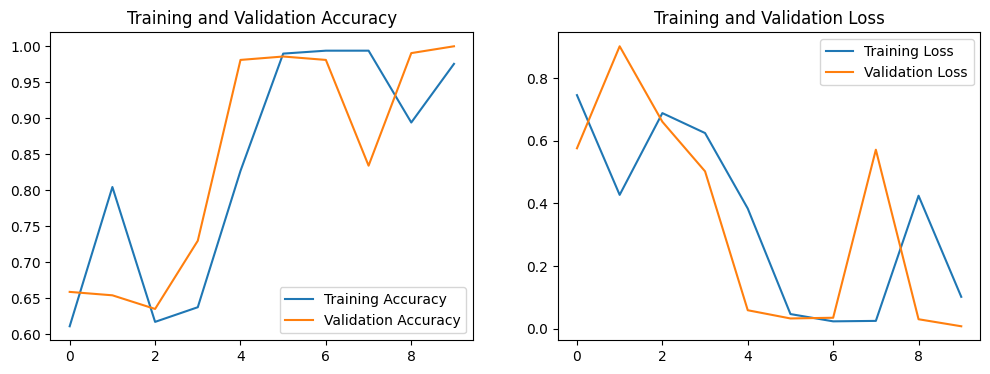

In [12]:
# Plot trend chart for Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc_history, label='Training Accuracy')
plt.plot(val_acc_history, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
# Save the model
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
model_save_path = os.path.join(dataset_path, f'model_{timestamp}.pth')
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to dataset_ebs_timm\model_20231221_092733.pth


In [14]:
# Predict Function
def predict_image(image_path, model, device, transform, class_names):
    image = Image.open(image_path).convert('RGB')
    inputs = transform(image).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        confidence = torch.nn.functional.softmax(outputs, dim=1)[0] * 100
    _, predicted_confidence = torch.max(confidence, 0)
    
    plt.imshow(image)
    plt.title(f"{class_names[predicted]} ({confidence[predicted].item():.2f}%)") #({confidence[predicted]:.2f}%)
    plt.show()

In [15]:
# Load the model weights 
filename = model_save_path
#filename = dataset_path + "/" + "model_20231220_105848.pth"

loaded_weights = torch.load(filename)

# load the weights 
model.load_state_dict(loaded_weights)

<All keys matched successfully>

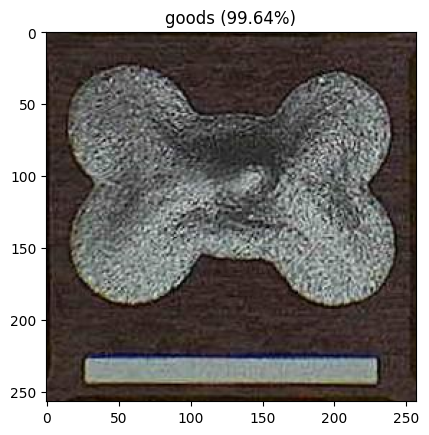

In [16]:
# Predict a Specific Image
image_path = "P2-034.jpg"
predict_image(image_path, model, device, transform, class_names)